In [8]:
import os
import pandas as pd
import xarray as xr
import csv
import warnings 
import tqdm
warnings.filterwarnings("ignore")
import numpy as np
import copy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
from SproutDataset import SproutDataset
from Augmentation import Augmentation
from Sprout_ML import Sprout_ML

In [12]:
wvl_array_common_OIII = np.arange(698.6,710.0,0.19)
wvl_array_common_OII = np.arange(714.3,722.8,0.19)
wvl_array_common_SIV = np.arange(745.9,754.4,0.19)
wvl_array_common_NeVIII = np.arange(764.7,776.2,0.19)
wvl_array_common_SV = np.arange(781.6,793.0,0.19)
wvl_array_common_CIII = np.arange(966.9,982.0,0.19)
wvl_array_common_NIII = np.arange(985.8,995.3,0.19)
wvl_array_common_OVI = np.arange(1027.2,1036.7,0.19)

In [13]:
wvl_array_common = np.hstack((wvl_array_common_OIII, wvl_array_common_OII, wvl_array_common_SIV, wvl_array_common_NeVIII, wvl_array_common_SV, 
                              wvl_array_common_CIII, wvl_array_common_NIII, wvl_array_common_OVI))
wvl_array_common.shape

(451,)

In [20]:
wvl_array_common

array([ 698.6 ,  698.79,  698.98,  699.17,  699.36,  699.55,  699.74,
        699.93,  700.12,  700.31,  700.5 ,  700.69,  700.88,  701.07,
        701.26,  701.45,  701.64,  701.83,  702.02,  702.21,  702.4 ,
        702.59,  702.78,  702.97,  703.16,  703.35,  703.54,  703.73,
        703.92,  704.11,  704.3 ,  704.49,  704.68,  704.87,  705.06,
        705.25,  705.44,  705.63,  705.82,  706.01,  706.2 ,  706.39,
        706.58,  706.77,  706.96,  707.15,  707.34,  707.53,  707.72,
        707.91,  708.1 ,  708.29,  708.48,  708.67,  708.86,  709.05,
        709.24,  709.43,  709.62,  709.81,  714.3 ,  714.49,  714.68,
        714.87,  715.06,  715.25,  715.44,  715.63,  715.82,  716.01,
        716.2 ,  716.39,  716.58,  716.77,  716.96,  717.15,  717.34,
        717.53,  717.72,  717.91,  718.1 ,  718.29,  718.48,  718.67,
        718.86,  719.05,  719.24,  719.43,  719.62,  719.81,  720.  ,
        720.19,  720.38,  720.57,  720.76,  720.95,  721.14,  721.33,
        721.52,  721

In [14]:
# Resolutions
# O III
(710-698.5)/60
# O II
(722.8-714.2)/45
# S IV
(754.4-745.8)/45
# Ne VIII
(776.2-764.6)/60
# OIV S V
(793-781.5)/60
# C III
(982-966.8)/80
# N III
(995.3-985.7)/51
# O VI
(1036.7-1027.1)/51

0.18823529411764972

In [15]:
all_spectra = xr.open_dataset("C:\\Users\\tania\\Documents\\SPICE\\SPROUTS\\spectra_train.nc")
flux_array = all_spectra.isel(index=10)['flux'].values
wvl_old = all_spectra.isel(index=10)['wvl'].values

In [ ]:
f = interp1d(wvl_old, flux_array)
flux_new = f(wvl_array_common)

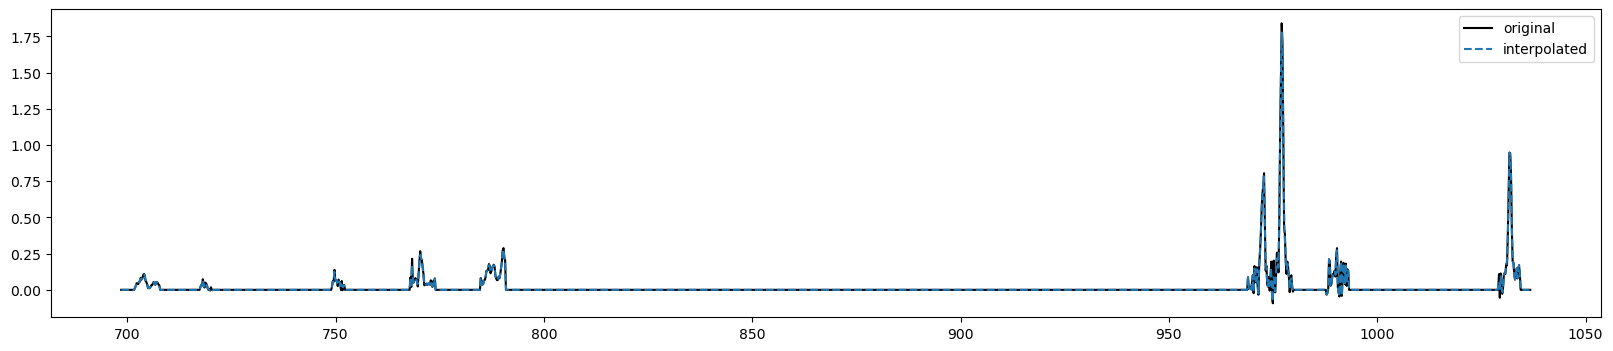

In [19]:
plt.figure(figsize=(20,4))
plt.plot(wvl_old, flux_array, label='original', color='k')
plt.plot(wvl_array_common, flux_new, label='interpolated', linestyle='--')
plt.legend()